In [1]:
import pandas as pd 
from scipy import stats 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_sas('data/demographics.xpt', format='xport', index=None, encoding='ISO-8859-1', chunksize=None, iterator=False)
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1.0,112.0,4.0,4.0,0.84
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1.0,108.0,7.0,7.0,1.78
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1.0,109.0,10.0,10.0,4.51
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2.0,109.0,9.0,9.0,2.52
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2.0,116.0,15.0,15.0,5.00


In [3]:
df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

In [4]:
df.shape

(10175, 47)

In [5]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,10175.000000,10175.0,10175.000000,10175.000000,1.017500e+04,6.730000e+02,10175.000000,10175.000000,9813.000000,4.213000e+03,...,9881.000000,10052.000000,5342.000000,10175.000000,1.017500e+04,10175.000000,10175.000000,10042.000000,10052.000000,9.390000e+03
mean,78644.000000,8.0,1.964423,1.508305,3.148413e+01,1.034175e+01,3.091892,3.289828,1.508509,1.074785e+02,...,3.502378,2.735078,3.612879,30585.180933,3.058518e+04,1.484128,110.926880,10.884983,10.505969,2.252153e+00
std,2937.413829,0.0,0.185243,0.499956,2.442165e+01,6.885479e+00,1.263305,1.613241,0.499953,6.977478e+01,...,1.251080,5.922690,1.321508,26948.427403,2.794101e+04,0.499773,4.260322,13.878864,13.643064,1.634907e+00
min,73557.000000,8.0,1.000000,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,...,1.000000,1.000000,1.000000,3697.772098,5.397605e-79,1.000000,104.000000,1.000000,1.000000,5.397605e-79
25%,76100.500000,8.0,2.000000,1.000000,1.000000e+01,5.000000e+00,2.000000,2.000000,1.000000,4.500000e+01,...,3.000000,1.000000,3.000000,12754.485277,1.256160e+04,1.000000,107.000000,5.000000,5.000000,8.700000e-01
50%,78644.000000,8.0,2.000000,2.000000,2.600000e+01,9.000000e+00,3.000000,3.000000,2.000000,1.030000e+02,...,4.000000,1.000000,4.000000,20232.999616,2.017457e+04,1.000000,111.000000,8.000000,7.000000,1.705000e+00
75%,81187.500000,8.0,2.000000,2.000000,5.200000e+01,1.600000e+01,4.000000,4.000000,2.000000,1.660000e+02,...,4.000000,4.000000,5.000000,36280.427224,3.674822e+04,2.000000,115.000000,14.000000,14.000000,3.607500e+00
max,83731.000000,8.0,2.000000,2.000000,8.000000e+01,2.400000e+01,5.000000,7.000000,2.000000,2.390000e+02,...,9.000000,99.000000,9.000000,167884.543709,1.713953e+05,2.000000,118.000000,99.000000,99.000000,5.000000e+00


In [6]:
# Number of NaN in each feature 
df.isnull().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    9502
RIDRETH1       0
RIDRETH3       0
RIDEXMON     362
RIDEXAGM    5962
DMQMILIZ    3914
DMQADFC     9632
DMDBORN4       0
DMDCITZN       4
DMDYRSUS    8267
DMDEDUC3    7372
DMDEDUC2    4406
DMDMARTL    4406
RIDEXPRG    8866
SIALANG        0
SIAPROXY       1
SIAINTRP       0
FIALANG      121
FIAPROXY     121
FIAINTRP     121
MIALANG     2864
MIAPROXY    2863
MIAINTRP    2862
AIALANGA    3858
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE       0
DMDHRBR4     297
DMDHREDU     294
DMDHRMAR     123
DMDHSEDU    4833
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     133
INDFMIN2     123
INDFMPIR     785
dtype: int64

In [7]:
# Number of NaN in each data point (person) 
df.T.isnull().sum() 

0         6
1         6
2         6
3         7
4         7
         ..
10170     9
10171    11
10172     9
10173    11
10174     8
Length: 10175, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  float64
 1   SDDSRVYR  10175 non-null  float64
 2   RIDSTATR  10175 non-null  float64
 3   RIAGENDR  10175 non-null  float64
 4   RIDAGEYR  10175 non-null  float64
 5   RIDAGEMN  673 non-null    float64
 6   RIDRETH1  10175 non-null  float64
 7   RIDRETH3  10175 non-null  float64
 8   RIDEXMON  9813 non-null   float64
 9   RIDEXAGM  4213 non-null   float64
 10  DMQMILIZ  6261 non-null   float64
 11  DMQADFC   543 non-null    float64
 12  DMDBORN4  10175 non-null  float64
 13  DMDCITZN  10171 non-null  float64
 14  DMDYRSUS  1908 non-null   float64
 15  DMDEDUC3  2803 non-null   float64
 16  DMDEDUC2  5769 non-null   float64
 17  DMDMARTL  5769 non-null   float64
 18  RIDEXPRG  1309 non-null   float64
 19  SIALANG   10175 non-null  float64
 20  SIAPROXY  10174 non-null  fl

In [9]:
for col in df.columns: 
    print(col, '\t', df[col].nunique(), '\t', df[col].unique()) 
    print(df[col].unique()) 
    print() 

SEQN 	 10175 	 [73557. 73558. 73559. ... 83729. 83730. 83731.]
[73557. 73558. 73559. ... 83729. 83730. 83731.]

SDDSRVYR 	 1 	 [8.]
[8.]

RIDSTATR 	 2 	 [2. 1.]
[2. 1.]

RIAGENDR 	 2 	 [1. 2.]
[1. 2.]

RIDAGEYR 	 81 	 [6.90000000e+01 5.40000000e+01 7.20000000e+01 9.00000000e+00
 7.30000000e+01 5.60000000e+01 5.39760535e-79 6.10000000e+01
 4.20000000e+01 6.50000000e+01 2.60000000e+01 7.60000000e+01
 1.00000000e+01 3.30000000e+01 1.00000000e+00 1.60000000e+01
 3.20000000e+01 1.80000000e+01 1.20000000e+01 3.80000000e+01
 5.00000000e+01 2.30000000e+01 7.00000000e+00 1.30000000e+01
 2.80000000e+01 4.00000000e+00 1.40000000e+01 1.10000000e+01
 3.50000000e+01 2.00000000e+00 6.00000000e+00 2.90000000e+01
 3.00000000e+00 5.80000000e+01 5.70000000e+01 2.00000000e+01
 3.70000000e+01 7.50000000e+01 4.30000000e+01 6.00000000e+01
 5.50000000e+01 6.20000000e+01 3.60000000e+01 8.00000000e+01
 3.10000000e+01 6.30000000e+01 7.10000000e+01 6.70000000e+01
 6.40000000e+01 8.00000000e+00 4.60000000e+01 4.40

In [10]:
# stats.zscore(df, nan_policy='omit').describe()
# df[(np.abs(stats.zscore(df, nan_policy='omit')) < 3).all(axis=1)]

<AxesSubplot:>

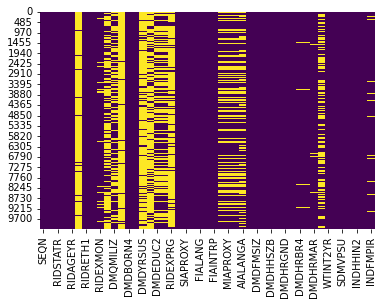

In [11]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


In [12]:
for col in df.columns: 
    df[col].fillna(df[col].mean(), inplace=True)

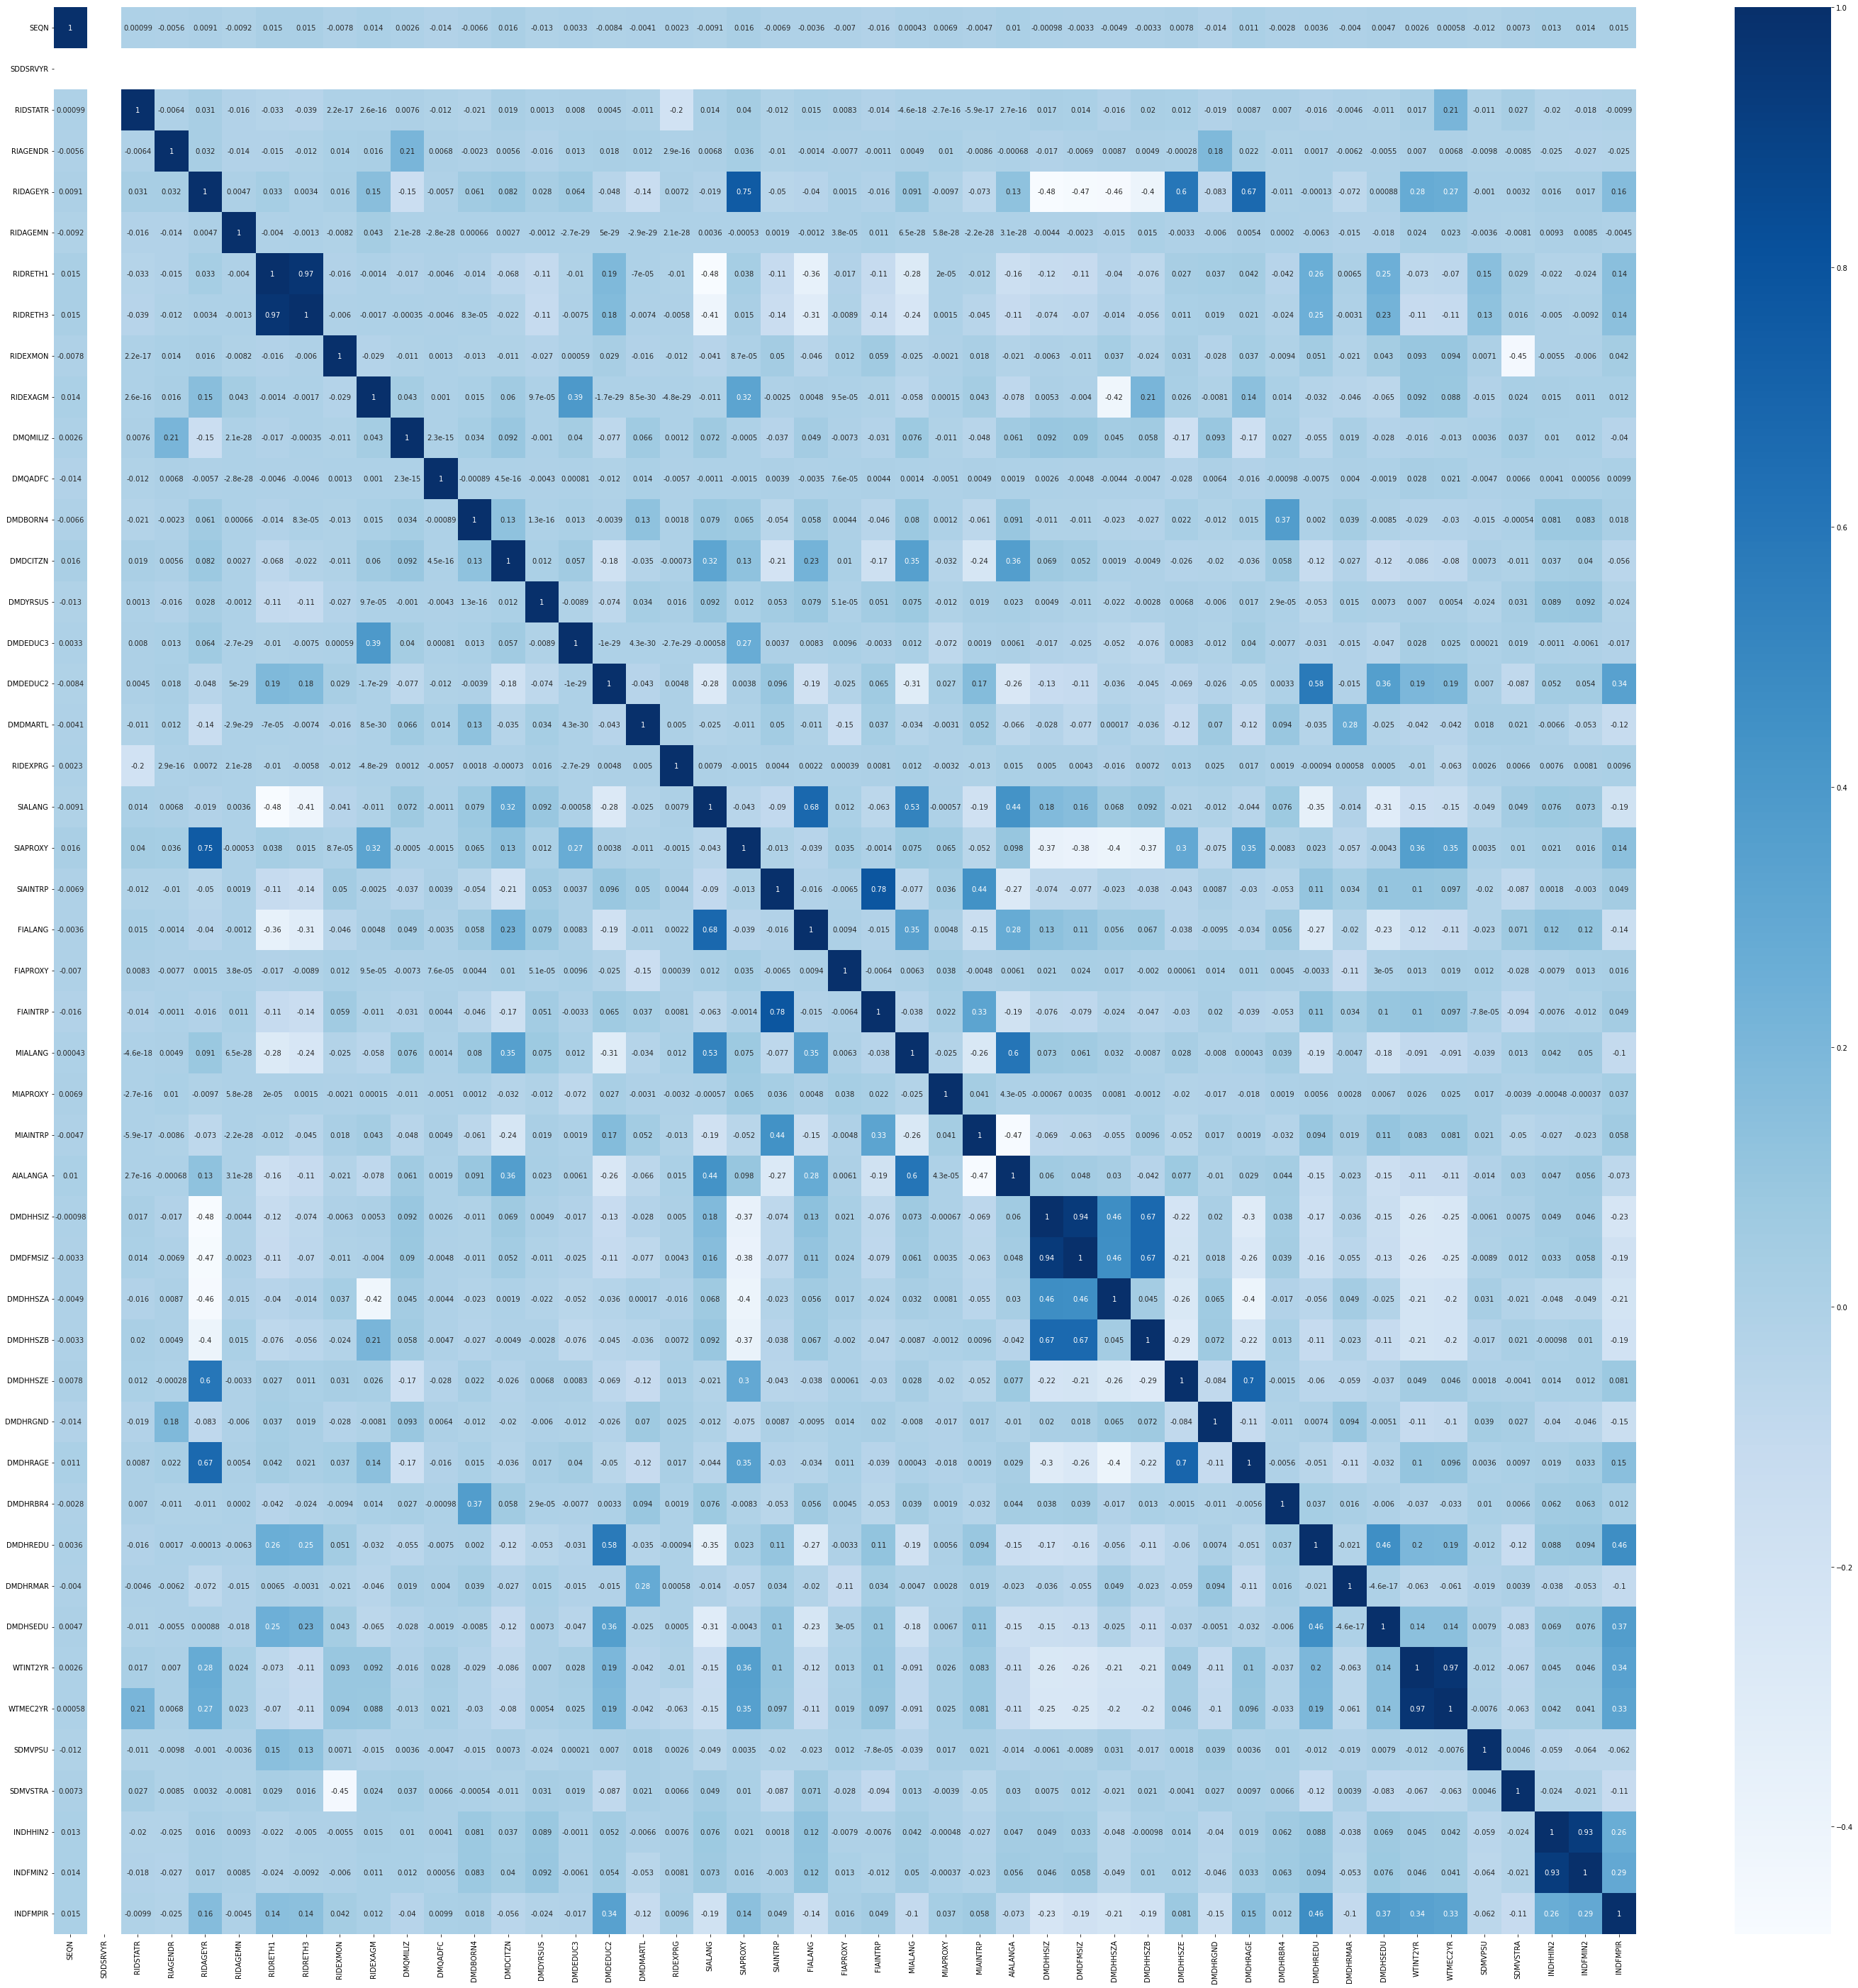

In [25]:
plt.figure(figsize=(50,50))

correlation_df = df.corr() 
# print(correlation_df.shape) 
# print(correlation_df.head()) 
sns.heatmap(correlation_df,cbar=True,annot=True,cmap='Blues') 
plt.savefig("correlation")

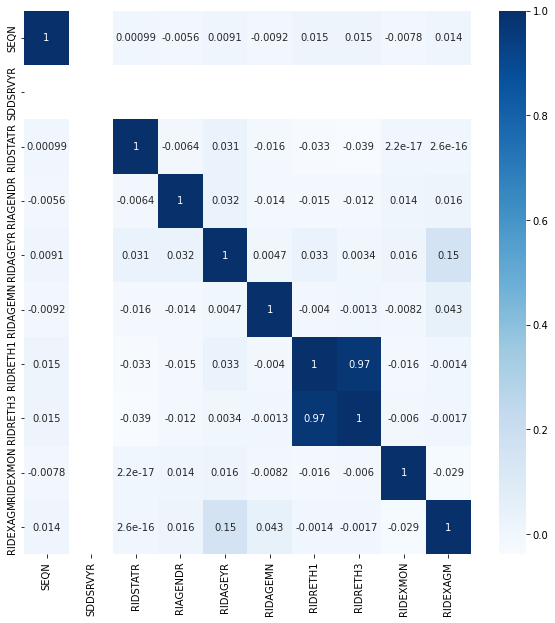

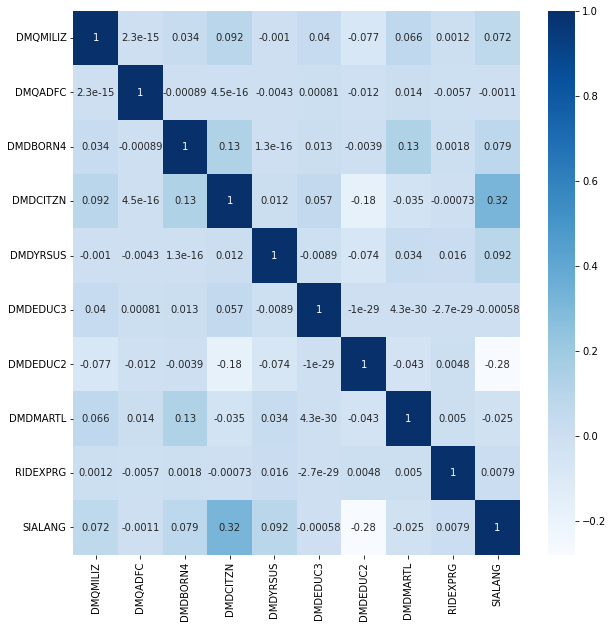

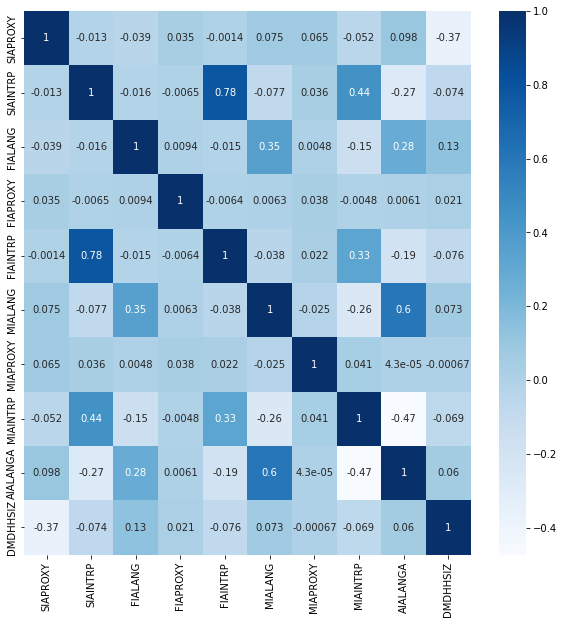

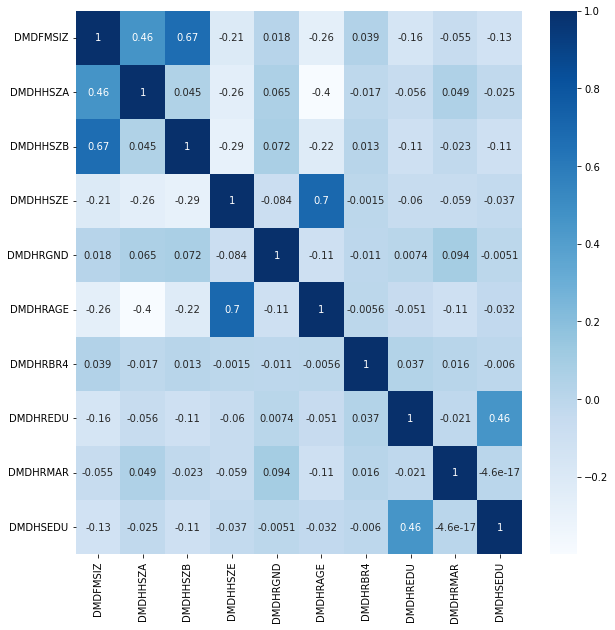

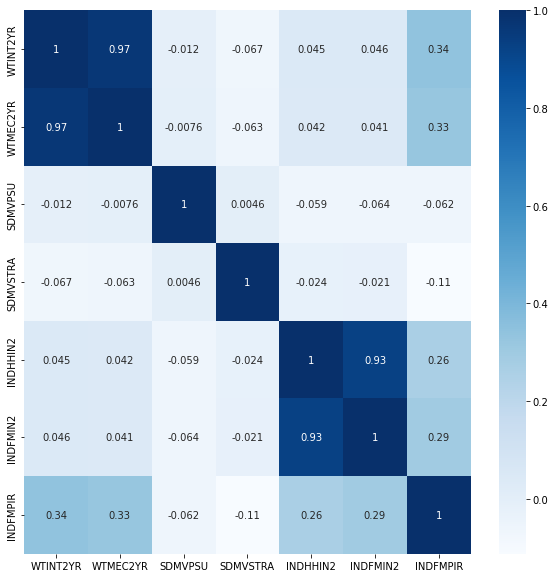

In [21]:
for cut in range(0,47,10):
    plt.figure(figsize=(10,10))

    correlation_df = df[df.columns[cut:cut+10]].corr() 
#     print(correlation_df.shape) 
#     print(correlation_df.head()) 
    sns.heatmap(correlation_df,cbar=True,annot=True,cmap='Blues') 
    
    plt.show() 